## Portfolio Assignment week 02 (PCA & t_SNE)
### Manifold learning

Manifold learning, also known as nonlinear dimensionality reduction, is a collection of approaches for analyzing and visualizing high-dimensional data in a lower-dimensional space. Manifold learning methods, as opposed to linear dimensionality reduction methods such as Principal Component Analysis (PCA), seek to capture non-linear relationships and structures in data.
The essential assumption behind manifold learning is that high-dimensional data frequently exists on or near a lower-dimensional manifold contained within the original space. A manifold is a curved or folded structure inside the data space that captures the data's core structure or patterns.


t-SNE (t-Distributed Stochastic Neighbor Embedding) is a popular manifold learning technique commonly used for visualizing high-dimensional data. It is particularly effective at capturing non-linear relationships and preserving the local structure of the data.

We are going to com,pare t_SNE and PCA for clustering in the liver cancer data. Source: https://sbcb.inf.ufrgs.br/cumida

[1] van der Maaten, L.J.P.; Hinton, G.E. Visualizing High-Dimensional Data Using t-SNE. 
Journal of Machine Learning Research 9:2579-2605, 2008. Use Case for t-SNE

In [18]:
# needed modules
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
import yaml
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.pipeline import Pipeline

# The data
The data comes from the above-mentioned website and categorizes different types of liver cancer.

steps we are going to take to compare the two clustering methodes:
- loading in the data
- check NAN values/ distibution/ correlation
- PCA and t-SNE 
- conclusion

In [6]:
# load the data in with the config file
with open("config.yml") as config:
    input_files = yaml.safe_load(config)
    df = pd.read_csv(input_files["liver"])

df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM362958.CEL.gz,HCC,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
1,GSM362959.CEL.gz,HCC,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
2,GSM362960.CEL.gz,HCC,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
3,GSM362964.CEL.gz,HCC,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
4,GSM362965.CEL.gz,HCC,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


In [8]:
# Examine the data properties 
amount_na= {}
# check shape
print(f"columns in the dataframe:{df.shape[1]}. Amount of rows {df.shape[0]}.")
# print(df.dtypes) # comment out because of cluttering in console
# check NAN
for col in df.columns:
    if df[col].isna().sum() > 0:
        amount_na[col] = df[col].isna().sum()
sorted_amount_na = sorted(amount_na.items(), key=lambda x:x[1], reverse=True)
print(f"the columns with NAN values:{sorted_amount_na}")
print(df["type"].unique(), "<- The groups in the data")


columns in the dataframe:22279. Amount of rows 357.
the columns with NAN values:[]
['HCC' 'normal'] <- The groups in the data


# PCA and t_SNE

The CSV file comprises 357 samples (rows) and 22277 gene expression levels (columns). This dataset has two distinct categories (column "type").
Furthermore, there are no NAN values present in any of the columns.
The sample names will be removed because they are no longer required.
Colors will go into the Type column.




In [9]:
types = list(df["type"])
X = df.drop(columns=["samples","type"])


# Scaling and clustering the data (t_SNE)

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
tsne = TSNE(n_components=2,learning_rate="auto",init="random",random_state=42)
tsne_cluster = tsne.fit_transform(X)

In [11]:
# make a data frame out of the data
tsne_df = pd.DataFrame(data = tsne_cluster,columns=["X","Y"])
tsne_df["types"] = types # add the types for the color later

### Plotting t_SNE

<function matplotlib.pyplot.show(close=None, block=None)>

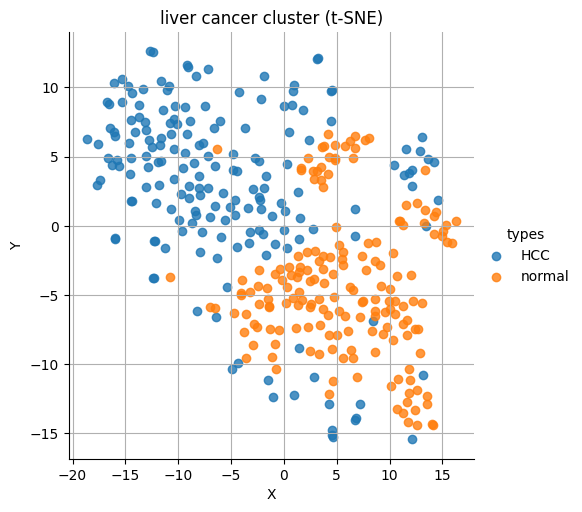

In [12]:
# plot the TSNE data 
sns.lmplot(
    x='X', 
    y='Y', 
    data = tsne_df, 
    hue='types', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('liver cancer cluster (t-SNE)')
plt.grid()
plt.show

As we can see from the plot, t_SNE is not very successful at clustering data based on gene extrassion levels.
There are several reasons why it is not as good.

- reason 1 :
High-dimensional data: Due to the "crowding problem," t-SNE might struggle with high-dimensional data, such as gene expression data. The number of points surrounding each point in high-dimensional space grows exponentially, making it impossible for t-SNE to accurately preserve the local structure. As a result, t-SNE may not be able to efficiently differentiate distinct sample types based on gene expression levels.

- reason 2:
Hyperparameter sensitivity: t-SNE contains various hyperparameters that must be carefully set for optimal results. The perplexity parameter, which affects the balance between local and global structure preservation, is especially significant. Choosing an incorrect perplexity value might result in distorted or misleading visualizations, preventing accurate sample type clustering. this we will do at the end of the noteboo


# Scaling and clustering the data (PCA)
Because the data has already been scaled, we will use that matrix.

In [15]:
# fitting and trasnforming with PCA
pca = PCA(n_components=2)
PCA_cluster = pca.fit_transform(X)

In [16]:
# make a data frame out of the data
PCA_df = pd.DataFrame(data=PCA_cluster,columns=["PC1","PC2"])
PCA_df["types"] = types # add the types for the color later

### Plotting PCA

<function matplotlib.pyplot.show(close=None, block=None)>

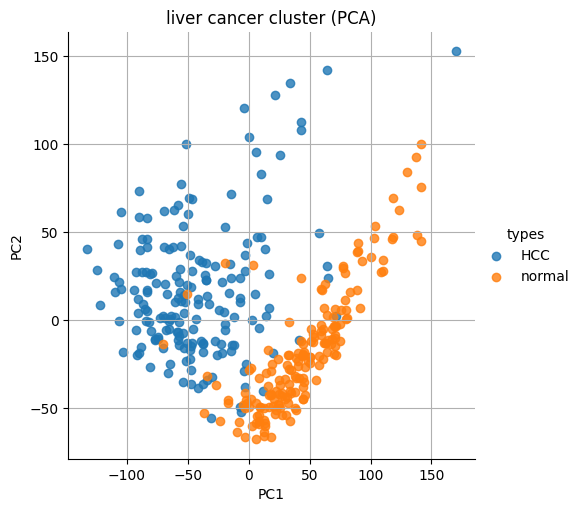

In [17]:
# plot the TSNE data 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data = PCA_df, 
    hue='types', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('liver cancer cluster (PCA)')
plt.grid()
plt.show

As shown in the plot, this looks much better than the t_SNE one. The reason for this is that PCA is far better at dealing with vast amounts of data, such as gene expression.
Another cause could be the robustness. Because it seeks to capture the general structure of the data rather than focusing on local interactions, PCA is reasonably resistant to noise and outliers. When dealing with noisy gene expression data, this resilience can be useful, as t-SNE may be more vulnerable to noise and yield less accurate results.

The final factor could be linearity. PCA presupposes that variables have a linear relationship. While this assumption may not be strictly applicable to gene expression data, it can nonetheless reflect the data's essential linear structures and correlations. In many circumstances, gene expression data is linear, making PCA an appropriate choice.

So for this type of data PCA is a lot better without optimizing the hyperparameters of the t_SNE

# Optimalization with gridsearchCV on hyperparameters t_SNE

In [20]:
from sklearn.metrics import adjusted_rand_score # for some reason it need this to work 
# pipeline with t-SNE as the estimator
pipeline = Pipeline([
    ('tsne', TSNE())
])

#parameter grid for the hyperparameters
param_grid = {
    'tsne__n_components': [2, 3, 4, 5],
    'tsne__perplexity': [10, 30, 50, 60, 70],
    'tsne__learning_rate': [100, 200, 500, 600 ,700]
}

# Perform the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='adjusted_rand_score')
grid_search.fit(X, types)

# Get the best t-SNE model
best_tsne_model = grid_search.best_estimator_

C:\Users\marsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\marsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\marsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\marsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

# optimized clustering with t_SNE

In [22]:
opti_tSNE_cluter = best_tsne_model.fit_transform(X)


In [24]:
# make a data frame out of the data
opti_df = pd.DataFrame(data = opti_tSNE_cluter,columns=["X","Y"])
opti_df["types"] = types # add the types for the color later

<function matplotlib.pyplot.show(close=None, block=None)>

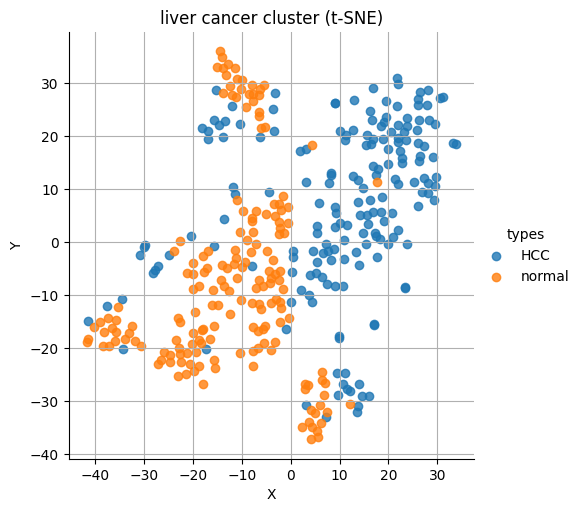

In [25]:
# plot the TSNE data 
sns.lmplot(
    x='X', 
    y='Y', 
    data = opti_df, 
    hue='types', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('liver cancer cluster (t-SNE)')
plt.grid()
plt.show

# conclusion
To summarize, t-SNE is not optimal for gene expression data due to its non-linear nature, hyperparameter sensitivity, and high-dimensionality problem. Because of the non-linear projections of t-SNE, mixed clusters can form, making it difficult to identify sample types based on gene expression levels. Choosing appropriate hyperparameters, such as perplexity, is critical yet difficult. Furthermore, t-SNE has difficulty maintaining local structure in high-dimensional gene expression data. Given these constraints, alternative techniques such as PCA or other dimensionality reduction methods paired with clustering algorithms may yield more trustworthy and interpretable findings for gene expression research.